In [142]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn import pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from category_encoders import TargetEncoder
from sklearn.preprocessing import LabelEncoder

In [143]:
X=pd.read_csv('/Users/gautammehta/Desktop/smal_project/data/processed/X_train_pro')
y=pd.read_csv('/Users/gautammehta/Desktop/smal_project/data/processed/y_train_pro')

In [144]:
X.head(5)

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Medication,Family_History,Exercise_Level,Smoking_Status
0,43,7.9,8,Normal,5.7,27.4,Beta Blocker,No,Moderate,Smoker
1,30,6.9,5,Normal,2.5,28.1,No,Yes,Low,Non-Smoker
2,34,7.9,5,Prehypertension,7.2,27.6,No,Yes,Moderate,Non-Smoker
3,32,10.4,9,Prehypertension,8.0,27.4,No,Yes,Moderate,Smoker
4,67,9.0,8,Hypertension,7.6,25.7,Diuretic,No,Low,Non-Smoker


In [145]:
X.describe(include='object')

,BP_History,Medication,Family_History,Exercise_Level,Smoking_Status
count,1588,1588,1588,1588,1588
unique,3,5,2,3,2
top,Normal,No,No,Low,Non-Smoker
freq,639,633,814,749,1134


In [146]:
X.describe()

,Age,Salt_Intake,Stress_Score,Sleep_Duration,BMI
count,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000
mean,50.702771,8.500693,4.974811,6.427834,25.993010
std,19.463434,2.012677,3.153197,1.530721,4.547702
min,18.000000,2.500000,0.000000,1.600000,11.900000
25%,34.000000,7.100000,2.000000,5.400000,22.900000
50%,50.000000,8.500000,5.000000,6.400000,25.900000
75%,68.000000,9.900000,8.000000,7.500000,29.100000
max,84.000000,16.400000,10.000000,11.400000,41.900000


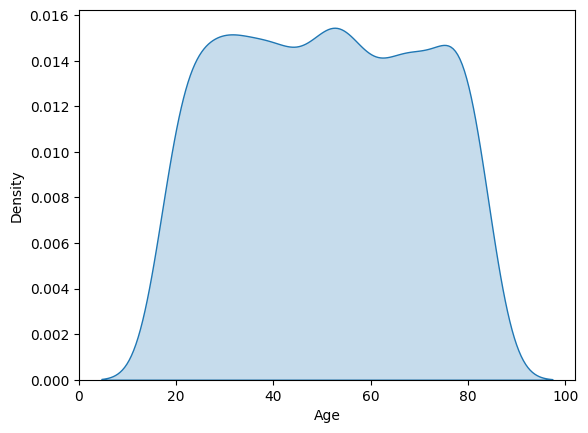

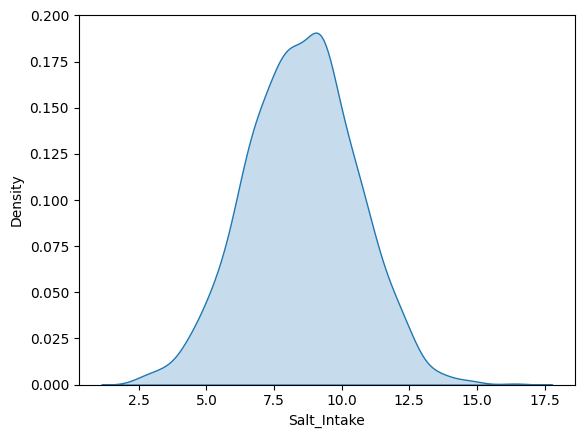

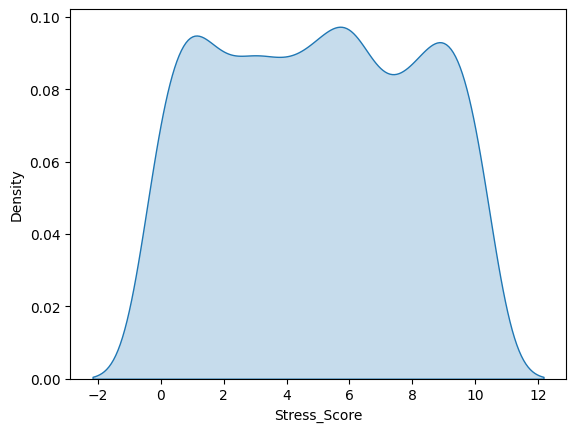

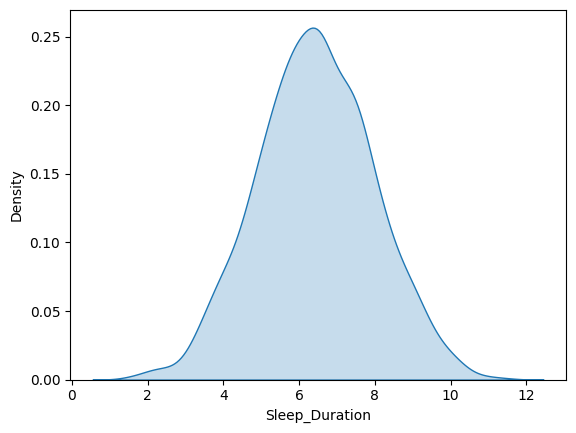

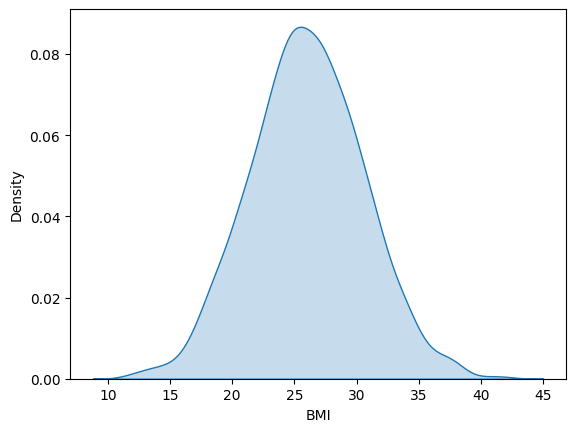

In [147]:
for x in X.select_dtypes('number').columns:
     sns.kdeplot(data=X,x=x,fill='green')
     plt.show()

In [148]:
data=X.copy()
data['y']=y
data

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Medication,Family_History,Exercise_Level,Smoking_Status,y
0,43,7.9,8,Normal,5.7,27.4,Beta Blocker,No,Moderate,Smoker,No
1,30,6.9,5,Normal,2.5,28.1,No,Yes,Low,Non-Smoker,No
2,34,7.9,5,Prehypertension,7.2,27.6,No,Yes,Moderate,Non-Smoker,No
3,32,10.4,9,Prehypertension,8.0,27.4,No,Yes,Moderate,Smoker,Yes
4,67,9.0,8,Hypertension,7.6,25.7,Diuretic,No,Low,Non-Smoker,Yes
...,...,...,...,...,...,...,...,...,...,...,...
1583,33,6.5,3,Hypertension,7.5,22.7,No,Yes,High,Non-Smoker,Yes
1584,56,11.0,4,Hypertension,8.3,30.0,No,No,Low,Non-Smoker,Yes
1585,40,9.3,8,Hypertension,5.5,28.6,No,Yes,Low,Non-Smoker,Yes
1586,57,16.4,6,Hypertension,5.4,19.0,No,Yes,Low,Smoker,Yes


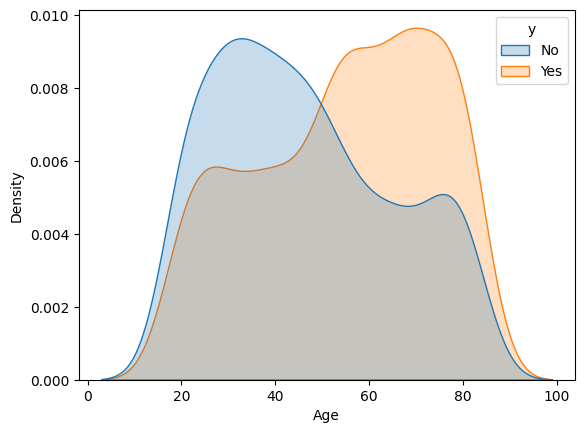

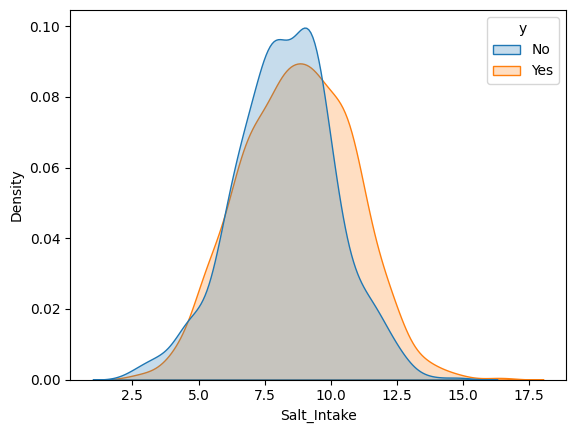

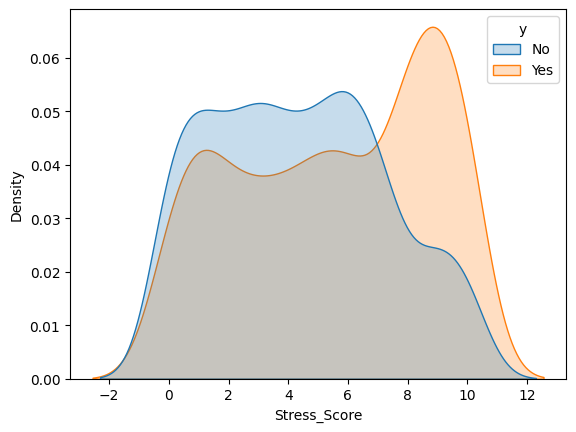

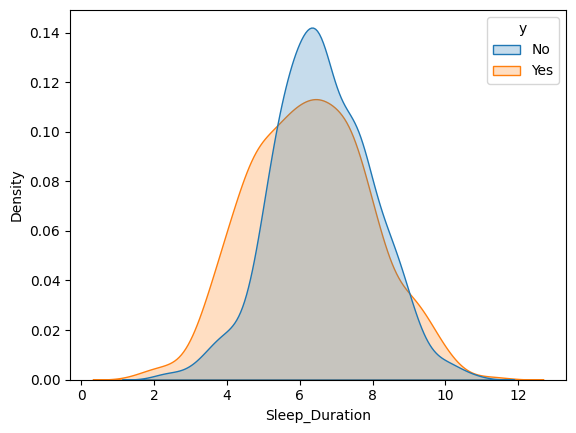

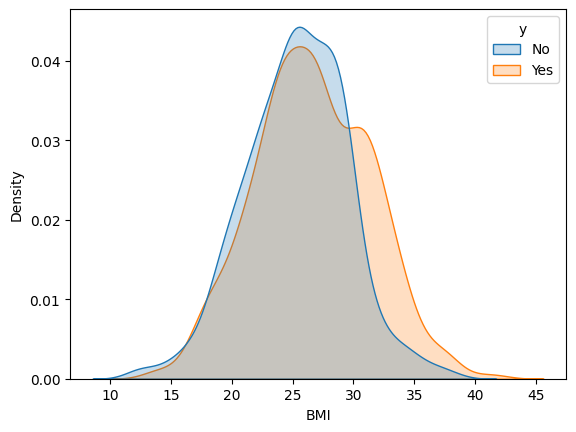

In [149]:
for x in X.select_dtypes('number').columns:
     sns.kdeplot(data=data,x=x,fill='green',hue='y')
     plt.show()

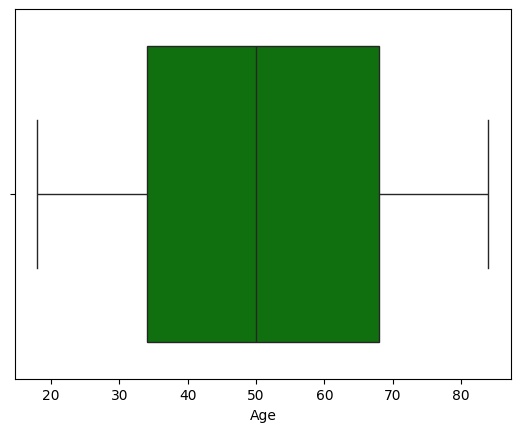

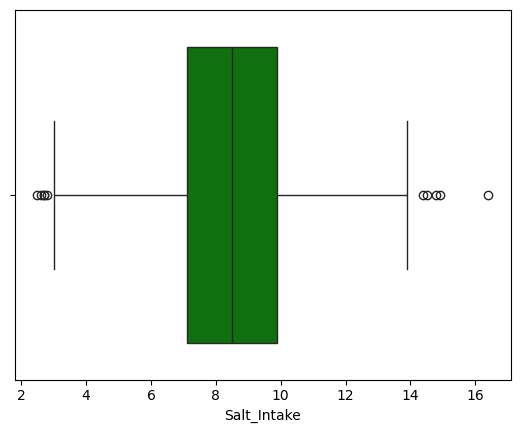

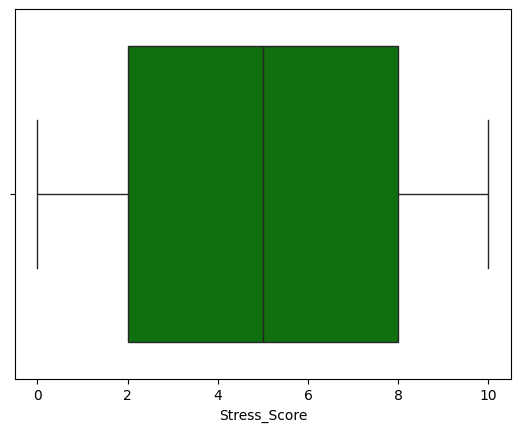

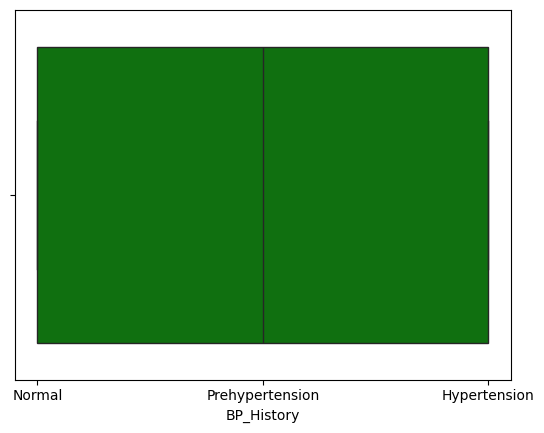

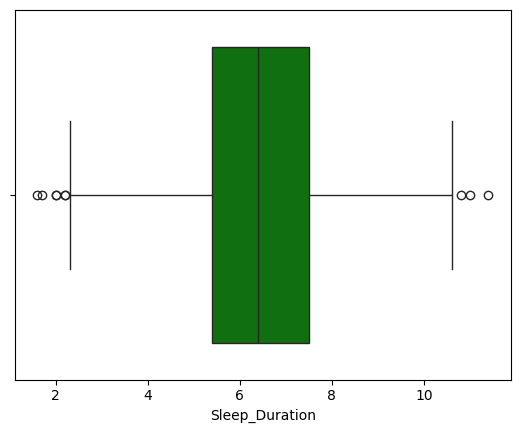

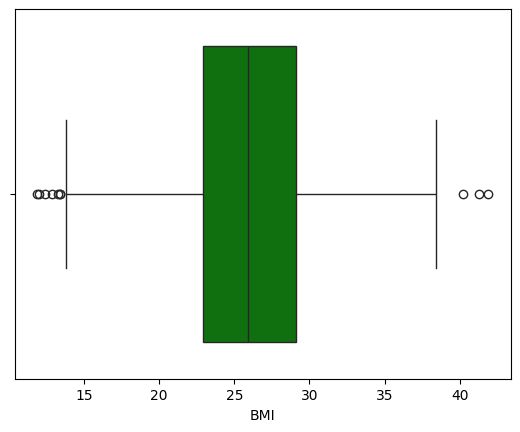

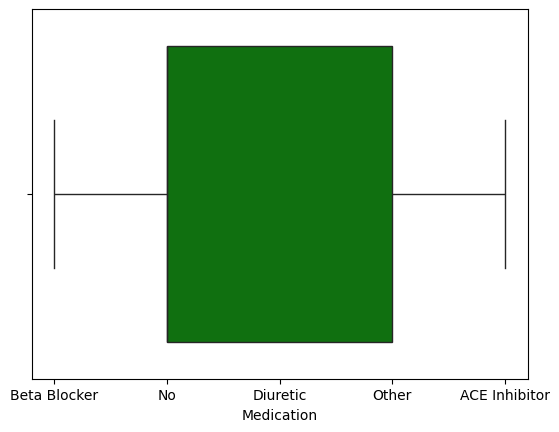

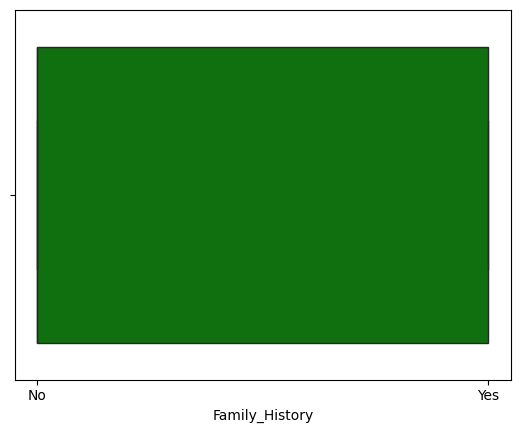

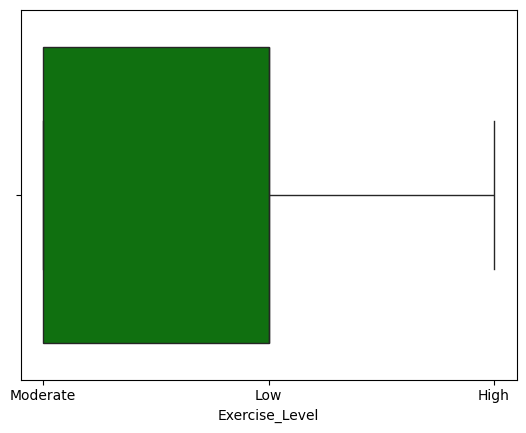

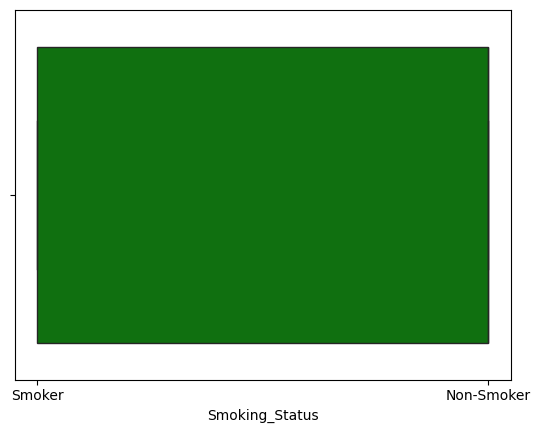

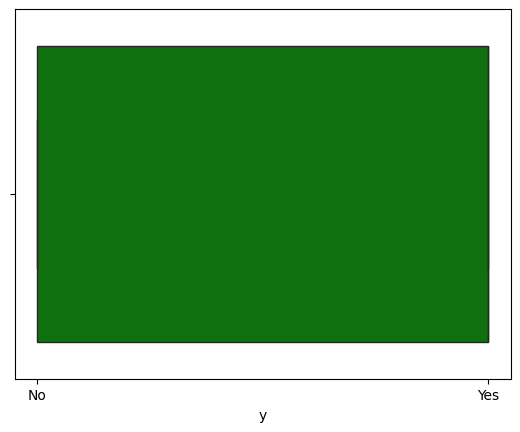

In [150]:
for x in data.columns:
    sns.boxplot(data=data,x=x,fill=True,color='Green')
    plt.show()

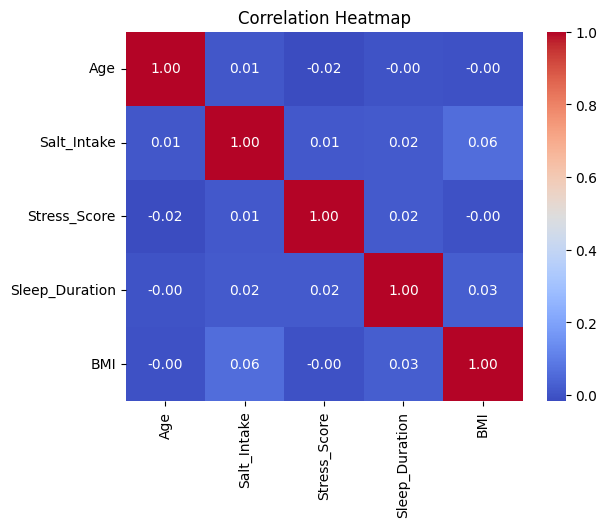

In [151]:
corr=data.select_dtypes('number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [152]:
data.head(5)

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Medication,Family_History,Exercise_Level,Smoking_Status,y
0,43,7.9,8,Normal,5.7,27.4,Beta Blocker,No,Moderate,Smoker,No
1,30,6.9,5,Normal,2.5,28.1,No,Yes,Low,Non-Smoker,No
2,34,7.9,5,Prehypertension,7.2,27.6,No,Yes,Moderate,Non-Smoker,No
3,32,10.4,9,Prehypertension,8.0,27.4,No,Yes,Moderate,Smoker,Yes
4,67,9.0,8,Hypertension,7.6,25.7,Diuretic,No,Low,Non-Smoker,Yes


In [153]:
#Function Transfomrer

ft=FunctionTransformer(func=np.log1p)
data_ft=ft.fit_transform(data.select_dtypes('number'))
data_ft

num_cols = data.select_dtypes(include='number').columns
pt = PowerTransformer(method='yeo-johnson')

# Apply the transformation
data_pt_array = pt.fit_transform(data[num_cols])

# Convert back to DataFrame with correct column names
data_pt = pd.DataFrame(data_pt_array, columns=num_cols, index=data.index)

# Preview
data_pt.head()


sq=FunctionTransformer(func=np.sqrt)
sqr=sq.fit_transform(data.select_dtypes('number'))
sqr

inv=FunctionTransformer(inverse_func=np.sqrt)
ubv_=inv.fit_transform(data.select_dtypes('number'))
ubv_

,Age,Salt_Intake,Stress_Score,Sleep_Duration,BMI
0,43,7.9,8,5.7,27.4
1,30,6.9,5,2.5,28.1
2,34,7.9,5,7.2,27.6
3,32,10.4,9,8.0,27.4
4,67,9.0,8,7.6,25.7
...,...,...,...,...,...
1583,33,6.5,3,7.5,22.7
1584,56,11.0,4,8.3,30.0
1585,40,9.3,8,5.5,28.6
1586,57,16.4,6,5.4,19.0


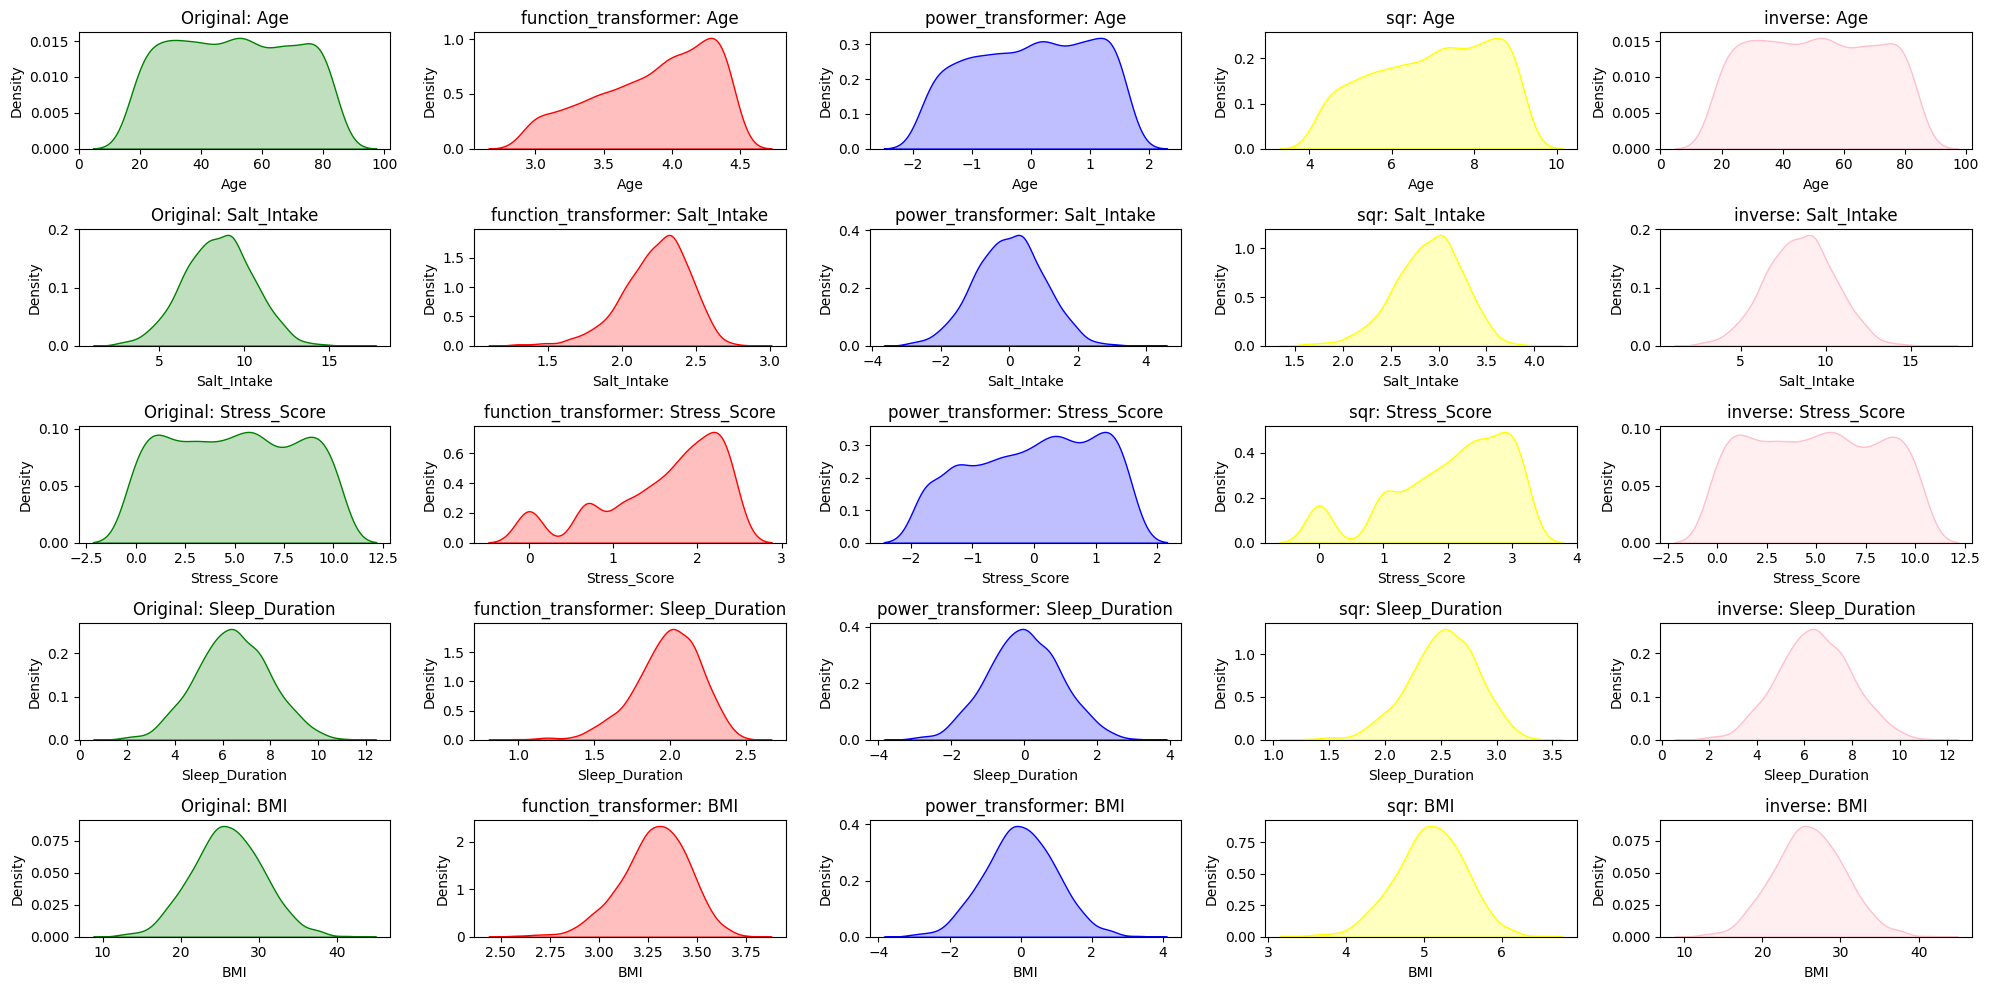

In [154]:
fig,axes=plt.subplots(5,5,figsize=(20,10))
for x in range(len(num_cols)):
    
    row=x

    feature = num_cols[x]

    sns.kdeplot(data=data,x=feature,fill=True,color='Green',ax=axes[row,0])
    axes[row, 0].set_title(f'Original: {feature}')


    sns.kdeplot(data=data_ft,x=feature,fill=True,color='Red',ax=axes[row,1])
    axes[row, 1].set_title(f'function_transformer: {feature}')


    sns.kdeplot(data=data_pt,x=feature,fill=True,color='Blue',ax=axes[row,2])
    axes[row, 2].set_title(f'power_transformer: {feature}')

    sns.kdeplot(data=sqr,x=feature,fill=True,color='yellow',ax=axes[row,3])
    axes[row, 3].set_title(f'sqr: {feature}')
    
    sns.kdeplot(data=ubv_,x=feature,fill=True,color='pink',ax=axes[row,4])
    axes[row, 4].set_title(f'inverse: {feature}')


plt.tight_layout()
plt.show()

In [155]:
data.head(5)

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Medication,Family_History,Exercise_Level,Smoking_Status,y
0,43,7.9,8,Normal,5.7,27.4,Beta Blocker,No,Moderate,Smoker,No
1,30,6.9,5,Normal,2.5,28.1,No,Yes,Low,Non-Smoker,No
2,34,7.9,5,Prehypertension,7.2,27.6,No,Yes,Moderate,Non-Smoker,No
3,32,10.4,9,Prehypertension,8.0,27.4,No,Yes,Moderate,Smoker,Yes
4,67,9.0,8,Hypertension,7.6,25.7,Diuretic,No,Low,Non-Smoker,Yes


In [156]:
cat_col=data.select_dtypes('object')
cat_col.drop(columns='Exercise_Level',inplace=True)

In [157]:
wor=OrdinalEncoder()

data['Exercise_Level']=wor.fit_transform(pd.DataFrame(data['Exercise_Level']))
cat_col=data.select_dtypes('object').columns


lc=LabelEncoder()
for x in cat_col:
    data[x]=lc.fit_transform(data[x])

In [158]:
# scaling

X=data.iloc[:,:10]
X

dt=StandardScaler()
finl=dt.fit_transform(X)
finl=pd.DataFrame(finl,columns=X.columns)
finl['y']=data['y']
finl


,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Medication,Family_History,Exercise_Level,Smoking_Status,y
0,-0.395881,-0.298549,0.959706,-0.030154,-0.475634,0.309482,-0.816438,-0.975120,1.220272,1.580442,0
1,-1.064010,-0.795556,0.007991,-0.030154,-2.566811,0.463455,0.726100,1.025514,-0.176838,-0.632734,0
2,-0.858432,-0.298549,0.007991,1.264011,0.504605,0.353474,0.726100,1.025514,1.220272,-0.632734,0
3,-0.961221,0.943969,1.276944,1.264011,1.027399,0.309482,0.726100,1.025514,1.220272,1.580442,1
4,0.837589,0.248159,0.959706,-1.324318,0.766002,-0.064451,-0.045169,-0.975120,-0.176838,-0.632734,1
...,...,...,...,...,...,...,...,...,...,...,...
1583,-0.909826,-0.994359,-0.626486,-1.324318,0.700653,-0.724332,0.726100,1.025514,-1.573949,-0.632734,1
1584,0.272249,1.242174,-0.309247,-1.324318,1.223447,0.881380,0.726100,-0.975120,-0.176838,-0.632734,1
1585,-0.550064,0.397261,0.959706,-1.324318,-0.606333,0.573435,0.726100,1.025514,-0.176838,-0.632734,1
1586,0.323643,3.926013,0.325229,-1.324318,-0.671682,-1.538186,0.726100,1.025514,-0.176838,1.580442,1


In [159]:
path=os.path.join('/Users/gautammehta/Desktop/smal_project/data','EDA')
os.makedirs(path,exist_ok=True)
finl[:,:10].to_csv(os.path.join(path,'X_EDA'),index=False)
finl[:,11:].to_csv(os.path.join(path,'y_EDA'),index=False)

InvalidIndexError: (slice(None, None, None), slice(None, 10, None))